In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import footballdata as foo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("darkgrid")

# 2016-17 Forecasts

In [2]:
five38 = foo.FiveThirtyEight()
print(five38.__doc__)

 Provides pandas.DataFrames from the fivethirtyeight.com project
    "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data

    Original project and background info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    


In [3]:
leagues = five38.read_leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
Champions League,0,1818,Champions League,0,32
ENG-Premier League,4,2411,Premier League,3,20
ESP-La Liga,4,1869,La Liga,3,20
FRA-Ligue 1,3,1843,Ligue 1,2,20
GER-Bundesliga,4,1845,Bundesliga,2,18
ITA-Serie A,3,1854,Serie A,3,20
MEX-Liga MX,4,1975,Liga MX,1,18
USA-MLS,3,1951,MLS,0,22
USA-NWSL,0,4582,NWSL,0,10


In [4]:
games = five38.read_games()
games.sample(5)

,,,adj_score_home,adj_score_away,aggregate_winner,chances_home,chances_away,date,leg,moves_home,moves_away,prob_home,...,shootout_winner,status,home_team,home_code,home_id,home_sdr_id,away_team,away_code,away_id,away_sdr_id
league,season,game_id,,,,,,,,,,,,,,,,,,,,,
ESP-La Liga,1617,2016-11-06 Real Madrid-Leganes,2.994,0.00,NaN,2.699,0.214,2016-11-06 11:00:00,NaN,1.535,0.362,0.9128,...,NaN,post,Real Madrid,MAD,86,74013,Leganes,LEG,17534,78708
Champions League,1617,2016-11-22 Leicester City-Club Brugge,2.100,1.05,NaN,2.086,0.266,2016-11-22 14:45:00,NaN,1.211,1.451,0.7144,...,NaN,post,Leicester City,LEI,375,73629,Club Brugge,CBKV,570,72883
ESP-La Liga,1617,2016-12-03 Atletico Madrid-Espanyol,0.000,0.00,NaN,0.649,0.997,2016-12-03 19:45:00,NaN,2.444,0.352,0.7436,...,NaN,post,Atletico Madrid,ATL,1068,74010,Espanyol,ESP,88,74018
GER-Bundesliga,1617,2016-10-02 Schalke 04-Borussia Monchengladbach,3.865,0.00,NaN,3.268,0.915,2016-10-02 15:30:00,NaN,0.915,1.344,0.3749,...,NaN,post,Schalke 04,SCH,133,74039,Borussia Monchengladbach,MGB,268,74048
ESP-La Liga,1617,2016-08-28 Las Palmas-Granada,4.806,1.05,NaN,2.770,0.506,2016-08-28 16:15:00,NaN,1.636,0.519,0.4862,...,NaN,post,Las Palmas,PAL,98,73975,Granada,GRN,3747,74005


In [5]:
forecasts = five38.read_forecasts()
forecasts.sample(5)

code conference  \
league           last_updated            name                                  
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids      CLR    Western   
Champions League 2016-09-26 14:00:00.000 Ludogorets           LUD        NaN   
                 2017-04-17 20:54:40.525 Paris Saint-Germain  PSG        NaN   
                 2017-03-12 21:55:40.543 FC Copenhagen        COP        NaN   
                 2016-10-17 14:00:00.000 Atletico Madrid      ATL        NaN   

                                                              current_losses  \
league           last_updated            name                                  
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids                   0   
Champions League 2016-09-26 14:00:00.000 Ludogorets                        0   
                 2017-04-17 20:54:40.525 Paris Saint-Germain               0   
                 2017-03-12 21:55:40.543 FC Copenhagen                     1   
                 2016-10-17 14:00:00.000 Atletico Madrid                   0   

                                                              current_ties  \
league           last_updated            name                                
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids                 0   
Champions League 2016-09-26 14:00:00.000 Ludogorets                      1   
                 2017-04-17 20:54:40.525 Paris Saint-Germain             3   
                 2017-03-12 21:55:40.543 FC Copenhagen                   3   
                 2016-10-17 14:00:00.000 Atletico Madrid                 0   

                                                              current_wins  \
league           last_updated            name                                
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids                 0   
Champions League 2016-09-26 14:00:00.000 Ludogorets                      0   
                 2017-04-17 20:54:40.525 Paris Saint-Germain             3   
                 2017-03-12 21:55:40.543 FC Copenhagen                   2   
                 2016-10-17 14:00:00.000 Atletico Madrid                 2   

                                                              d_rating  \
league           last_updated            name                            
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids       1.49810   
Champions League 2016-09-26 14:00:00.000 Ludogorets            0.84785   
                 2017-04-17 20:54:40.525 Paris Saint-Germain   0.70418   
                 2017-03-12 21:55:40.543 FC Copenhagen         1.04018   
                 2016-10-17 14:00:00.000 Atletico Madrid       0.54620   

                                                              first_round_bye  \
league           last_updated            name                                   
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids              0.15942   
Champions League 2016-09-26 14:00:00.000 Ludogorets                       NaN   
                 2017-04-17 20:54:40.525 Paris Saint-Germain              NaN   
                 2017-03-12 21:55:40.543 FC Copenhagen                    NaN   
                 2016-10-17 14:00:00.000 Atletico Madrid                  NaN   

                                                              goal_diff  \
league           last_updated            name                             
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids       -0.39186   
Champions League 2016-09-26 14:00:00.000 Ludogorets            -3.09500   
                 2017-04-17 20:54:40.525 Paris Saint-Germain    6.00000   
                 2017-03-12 21:55:40.543 FC Copenhagen          5.00000   
                 2016-10-17 14:00:00.000 Atletico Madrid        6.61870   

                                                              goals_against  \
league           last_updated            name                                 
USA-MLS          2017-03-01 16:14:09.880 Colorado Rapids           40.9857

# The most competitive League

The English Premier League is widely regarded as the most competitive football league in the world. Let's compare the EPL to La Liga.

In [6]:
epl_top3_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

epl_top3_contenders.head()

,last_updated,name,code,conference,current_losses,current_ties,current_wins,d_rating,first_round_bye,goal_diff,...,position_8,position_9,relegated,sdr_id,ties,win_final,win_league,wins,top3_chance,points
723,2017-05-21 15:58:38.176,Chelsea,CHE,NaN,5,3,30,0.75055,NaN,52.0,...,0.0,0.0,0.0,73598,3.0,NaN,1.0,30.0,1.0,93
736,2017-05-21 15:58:38.176,Tottenham Hotspur,TOT,NaN,4,8,26,0.67874,NaN,60.0,...,0.0,0.0,0.0,73602,8.0,NaN,0.0,26.0,1.0,86
729,2017-05-21 15:58:38.176,Manchester City,MNC,NaN,6,9,23,0.72773,NaN,41.0,...,0.0,0.0,0.0,73608,9.0,NaN,0.0,23.0,1.0,78
728,2017-05-21 15:58:38.176,Liverpool,LIV,NaN,6,10,22,0.84054,NaN,36.0,...,0.0,0.0,0.0,73600,10.0,NaN,0.0,22.0,0.0,76
721,2017-05-21 15:58:38.176,Arsenal,ARS,NaN,9,6,23,1.00141,NaN,33.0,...,0.0,0.0,0.0,73616,6.0,NaN,0.0,23.0,0.0,75


Halfway through the season, at least five teams had a shot at making the top 3 of the Premier League:

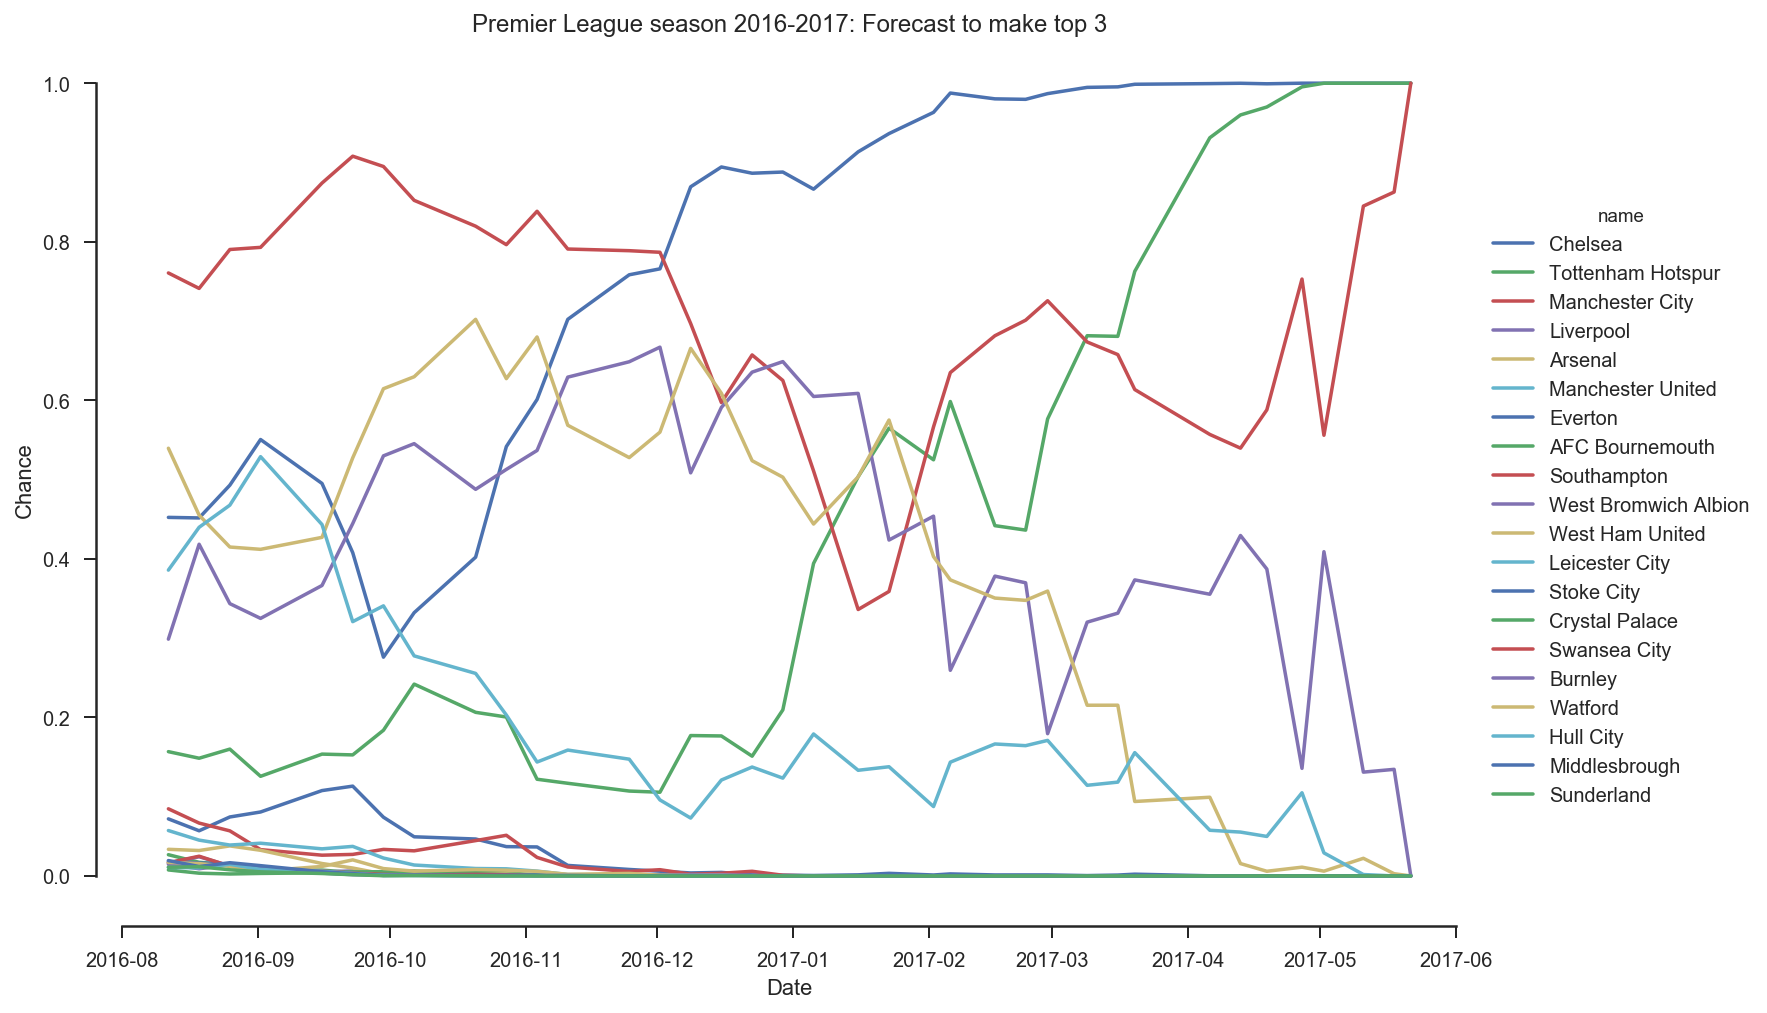

In [7]:
pal = sns.color_palette(n_colors=len(epl_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_top3_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

...while as usual, La Liga showed a very different picture:

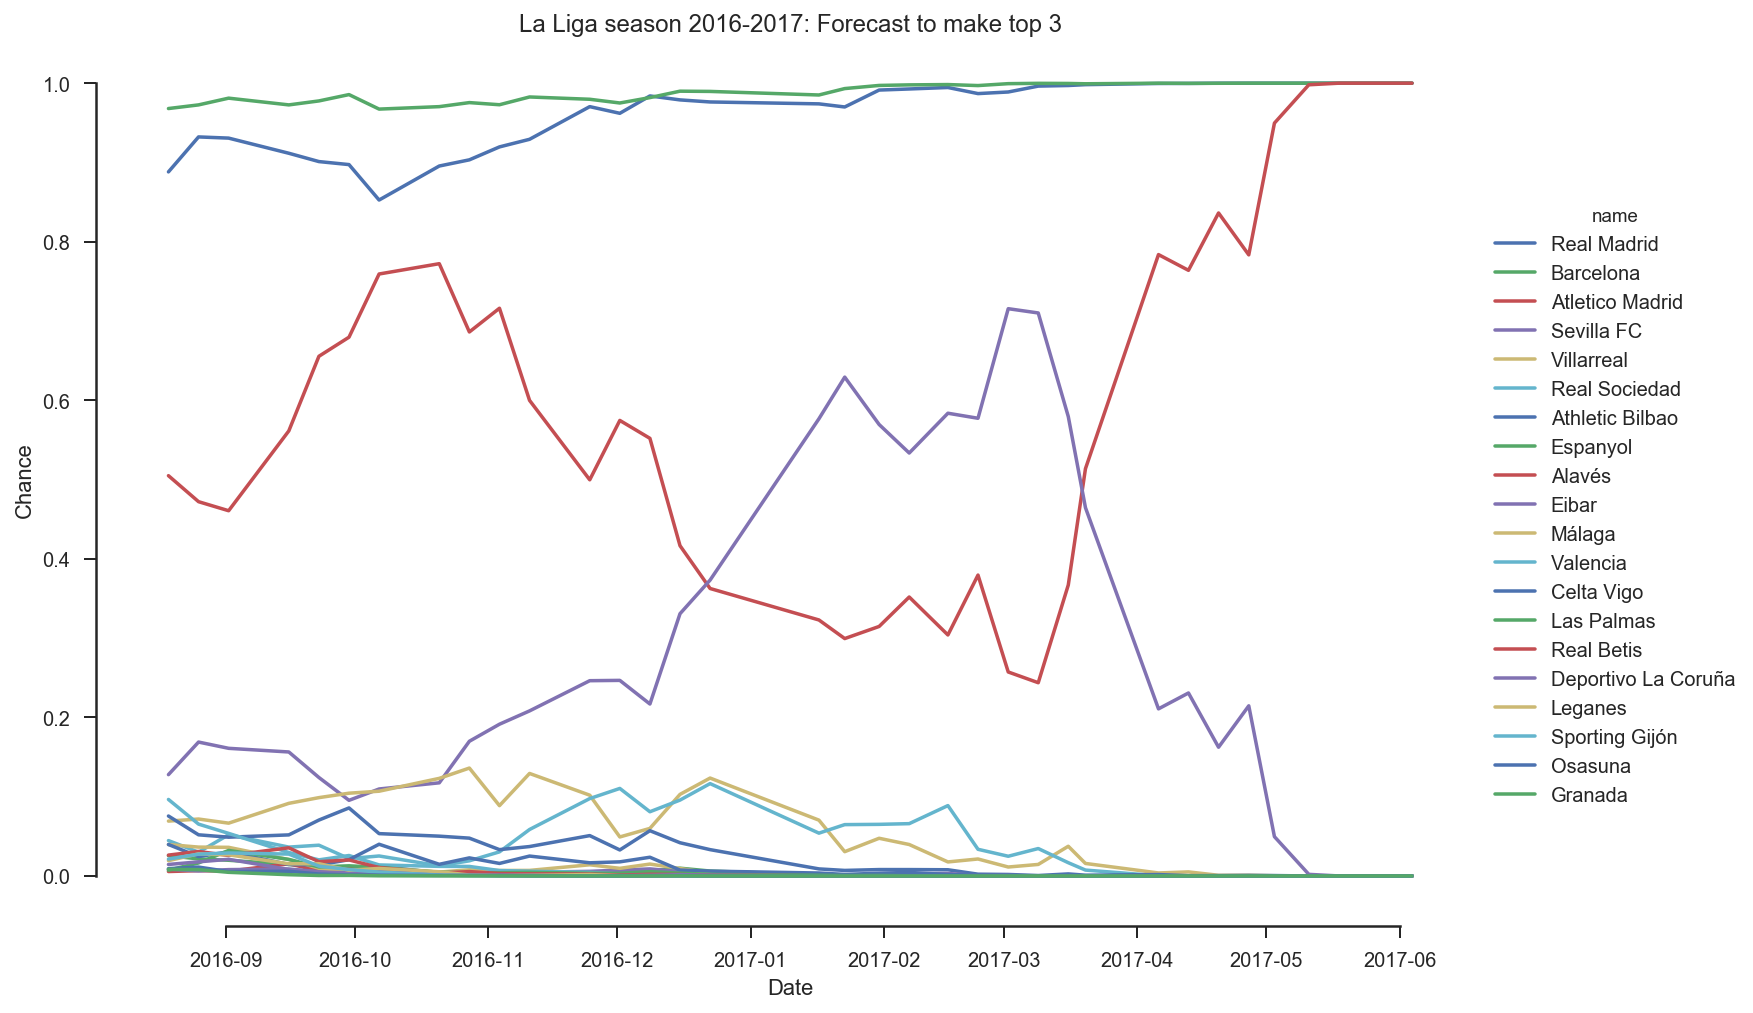

In [8]:
laliga_top3_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_top3_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

When we look at actually winning La Liga, only Real and Barça ever had a chance. This has been the case for many years now in La Liga, so no surprise there.

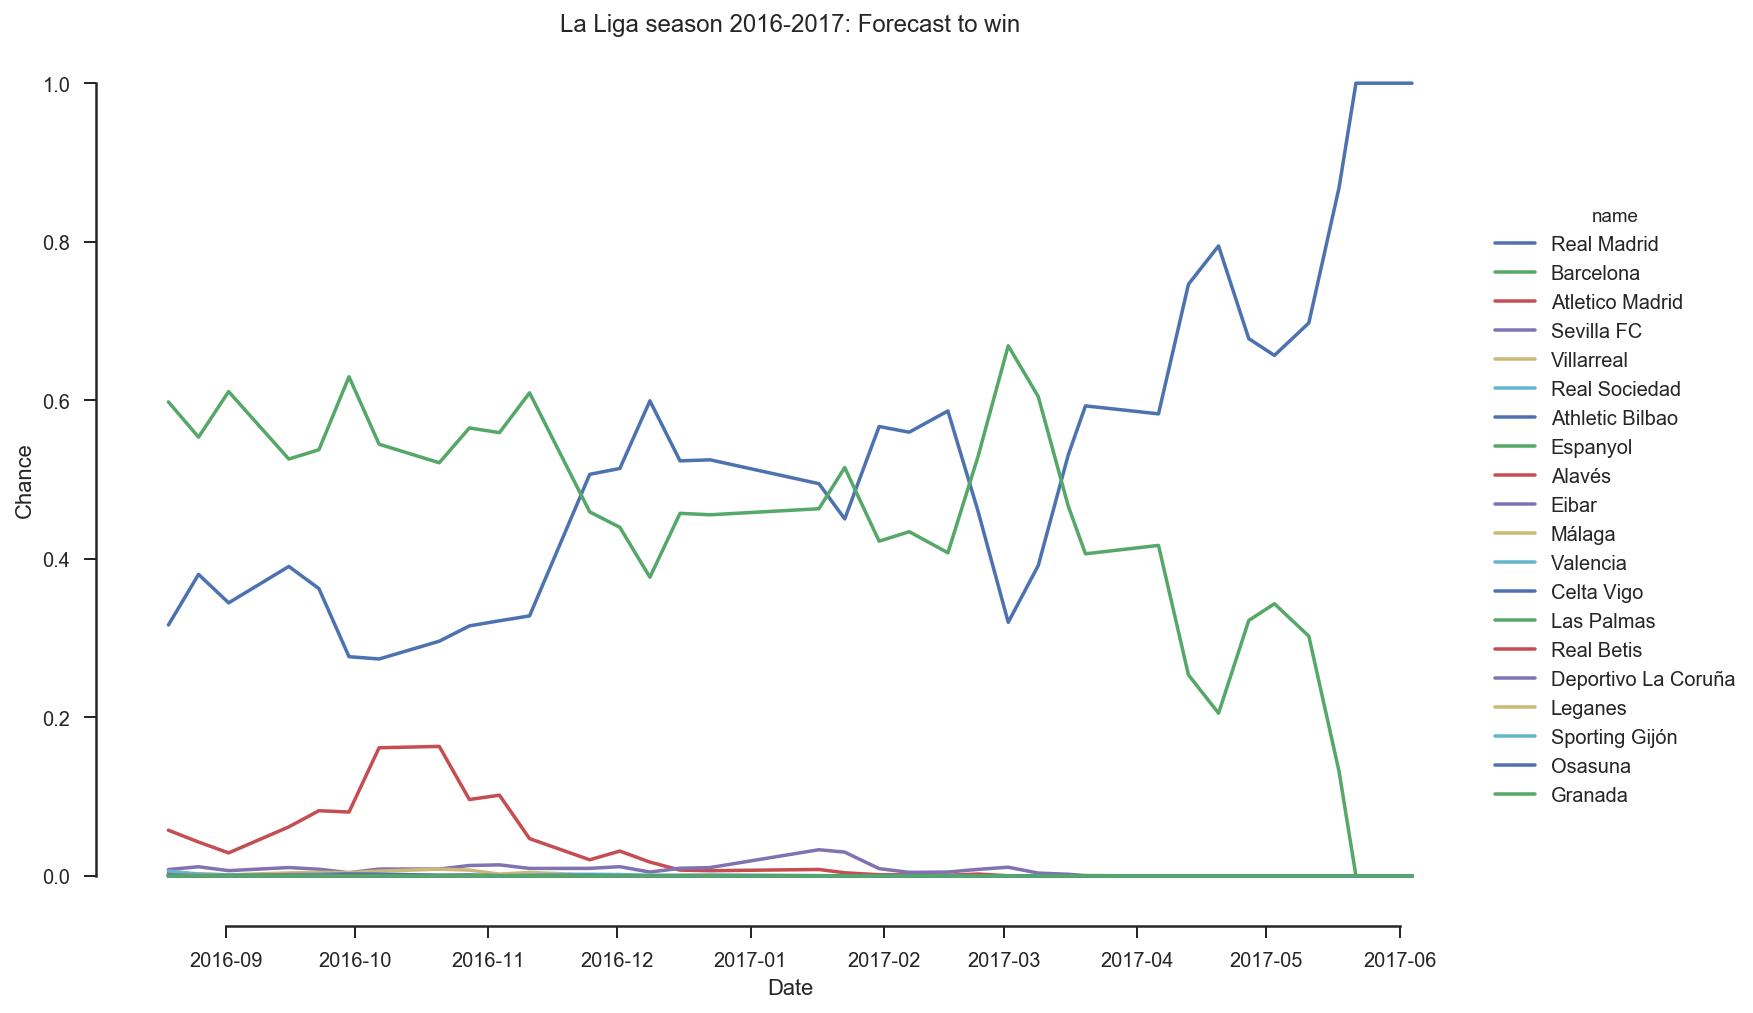

In [9]:
laliga_win_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_win_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

...But the EPL winner for this season was decided as early as December:

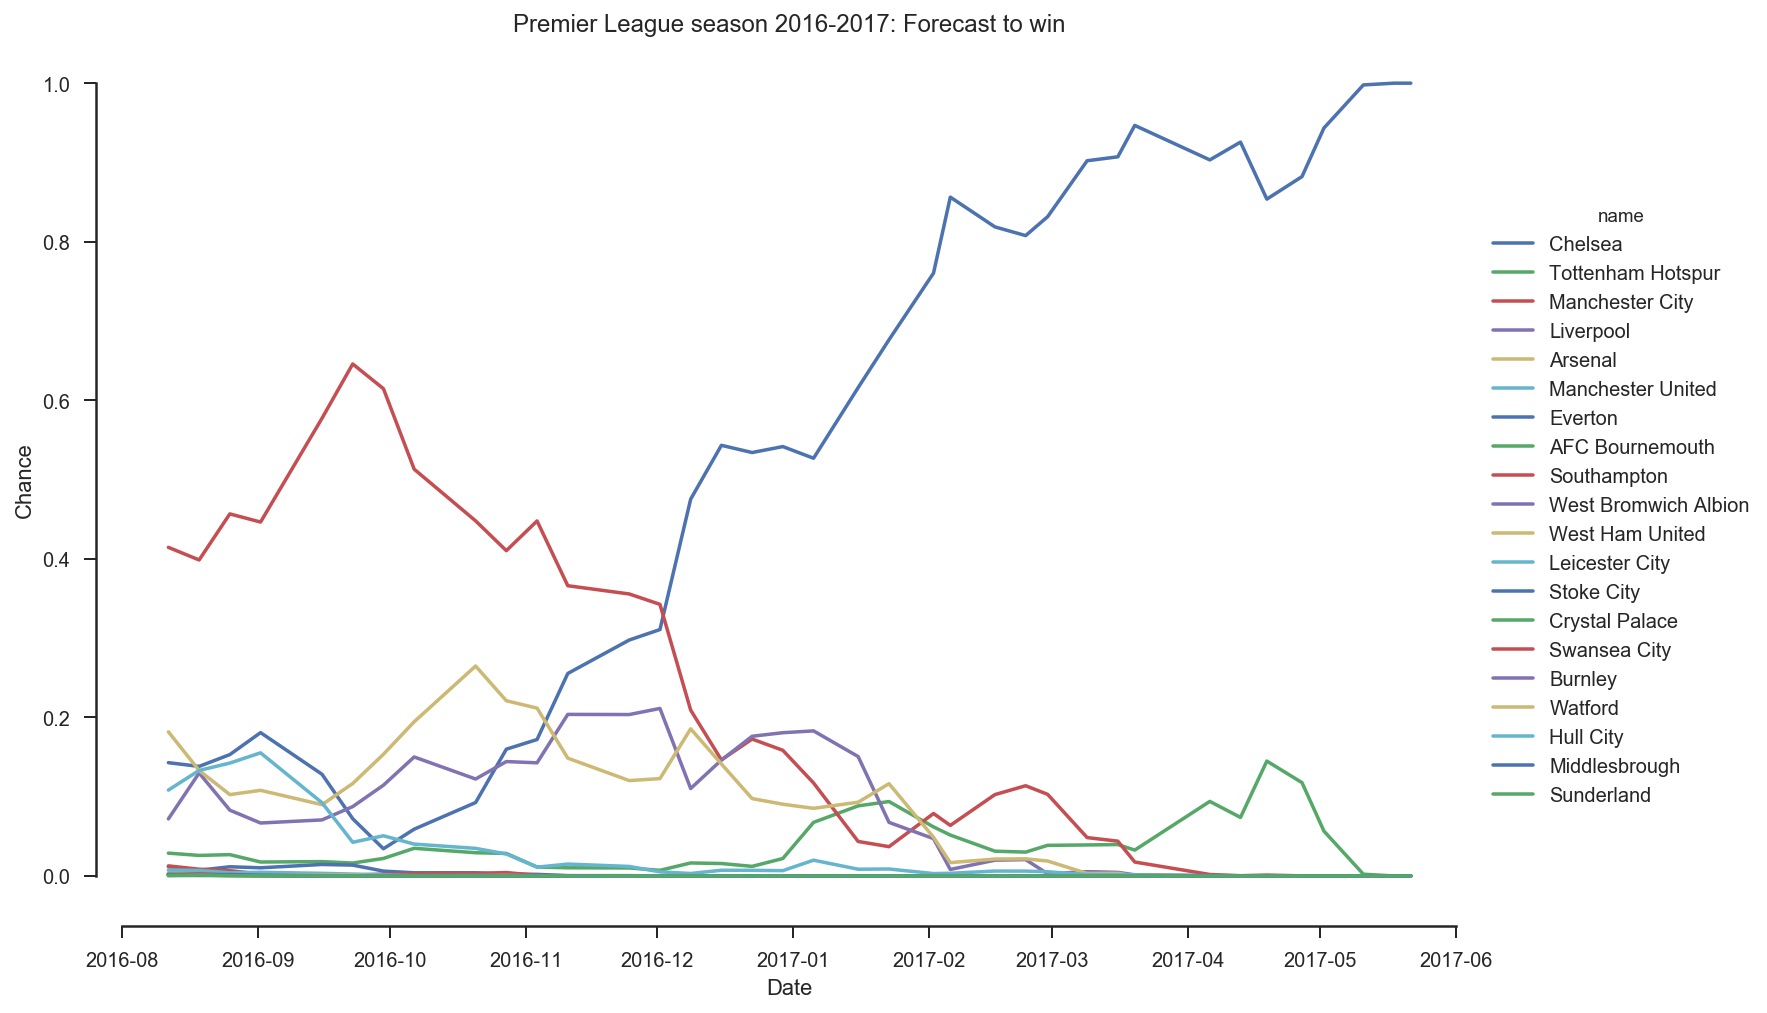

In [10]:
epl_win_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_win_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

# Match history

In [11]:
print(foo.MatchHistory.__doc__)

Provides pandas.DataFrames from CSV files available at
    http://www.football-data.co.uk/data.php

    Column names are explained here: http://www.football-data.co.uk/notes.txt

    Data will be downloaded as necessary and cached locally in ./data

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    seasons : string, int or list of seasons. Examples:
              '16-17'; 2016; '2016-17'; [14, 15, 16]
    


In [12]:
foo.MatchHistory.available_leagues()

['BEL-Jupiler League',
 'ENG-Championship',
 'ENG-Conference',
 'ENG-League 1',
 'ENG-League 2',
 'ENG-Premier League',
 'ESP-La Liga',
 'ESP-La Liga 2',
 'FRA-Ligue 1',
 'FRA-Ligue 2',
 'GER-Bundesliga',
 'GER-Bundesliga 2',
 'GRE-Ethniki Katigoria',
 'ITA-Serie A',
 'ITA-Serie B',
 'NED-Eredivisie',
 'POR-Liga 1',
 'SCO-Division 1',
 'SCO-Division 2',
 'SCO-Division 3',
 'SCO-Premier League',
 'TUR-Ligi 1']

# Home team advantage in the Dutch Eredivisie

We all know sports teams have an advantage when playing at home. Here's a look at home team advantage for 3 years of the Eredivisie, inspired by [this great example](https://tomaugspurger.github.io/modern-5-tidy.html) by Tom Augspurger.

Travel distances in the Netherlands are small, it would be interesting to compare this to competitions where the away team often have to travel further.

In [13]:
eredivisie = foo.MatchHistory('NED-Eredivisie', range(2014, 2017)).read_games()
eredivisie.sample(5)

index  away_team  \
league         season game_id                                                  
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda            127  NAC Breda   
               1617   2016-08-28 ADO Den Haag-Heracles         33   Heracles   
               1415   2014-09-13 PEC Zwolle-PSV                40        PSV   
               1516   2016-03-13 Vitesse-Feyenoord            242  Feyenoord   
               1415   2015-04-12 Go Ahead Eagles-FC Twente    267  FC Twente   

                                                            B365A  B365D  \
league         season game_id                                              
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda           7.00   4.33   
               1617   2016-08-28 ADO Den Haag-Heracles       3.75   3.50   
               1415   2014-09-13 PEC Zwolle-PSV              1.75   3.60   
               1516   2016-03-13 Vitesse-Feyenoord           2.80   3.25   
               1415   2015-04-12 Go Ahead Eagles-FC Twente   1.80   3.60   

                                                            B365H   BWA   BWD  \
league         season game_id                                                   
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda           1.44  6.00  4.20   
               1617   2016-08-28 ADO Den Haag-Heracles       1.95  3.50  3.60   
               1415   2014-09-13 PEC Zwolle-PSV              4.60  1.80  3.40   
               1516   2016-03-13 Vitesse-Feyenoord           2.50  2.95  3.20   
               1415   2015-04-12 Go Ahead Eagles-FC Twente   4.33  1.80  3.75   

                                                             BWH  Bb1X2  BbAH  \
league         season game_id                                                   
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda          1.44     48    26   
               1617   2016-08-28 ADO Den Haag-Heracles      1.95     52    25   
               1415   2014-09-13 PEC Zwolle-PSV             4.00     45    22   
               1516   2016-03-13 Vitesse-Feyenoord          2.35     44    26   
               1415   2015-04-12 Go Ahead Eagles-FC Twente  3.90     49    30   

                                                            ...    PSH  SJA  \
league         season game_id                               ...               
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda          ...   1.49  NaN   
               1617   2016-08-28 ADO Den Haag-Heracles      ...   2.01  NaN   
               1415   2014-09-13 PEC Zwolle-PSV             ...   4.23  1.8   
               1516   2016-03-13 Vitesse-Feyenoord          ...   2.54  NaN   
               1415   2015-04-12 Go Ahead Eagles-FC Twente  ...   3.99  NaN   

                                                            SJD   SJH   VCA  \
league         season game_id                                                 
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda          NaN   NaN  6.50   
               1617   2016-08-28 ADO Den Haag-Heracles      NaN   NaN  3.75   
               1415   2014-09-13 PEC Zwolle-PSV             3.6  4.33  1.85   
               1516   2016-03-13 Vitesse-Feyenoord          NaN   NaN  2.80   
               1415   2015-04-12 Go Ahead Eagles-FC Twente  NaN   NaN  1.90   

                                                             VCD   VCH   WHA  \
league         season game_id                                                  
NED-Eredivisie 1415   2014-12-06 Cambuur-NAC Breda          4.60  1.50  7.00   
               1617   2016-08-28 ADO Den Haag-Heracles      3.70  1.95  4.00   
               1415   2014-09-13 PEC Zwolle-PSV             3.75  4.33  1.83   
               1516   2016-03-13 Vitesse-Feyenoord          3.40  2.50  2.75   
               1415   2015-04-12 Go Ahead Eagles-FC Twente  3.70  3.90  1.80   

                                                             WHD   WHH  
league         season game_id                                           
NED-Eredivisie 

In [14]:
def home_away_results(games: pd.DataFrame):
    """Returns aggregated home/away results per team"""
    
    res = (
        pd.melt(games.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['home_team', 'away_team']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [15]:
results = home_away_results(eredivisie)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team         is_home                                                     
ADO Den Haag Away        11  0.215686      27  0.529412      13  0.254902
             Home        19  0.372549      17  0.333333      15  0.294118
AZ Alkmaar   Away        25  0.490196      17  0.333333       9  0.176471
             Home        24  0.470588      13  0.254902      14  0.274510
Ajax         Away        32  0.627451       6  0.117647      13  0.254902
             Home        39  0.764706       4  0.078431       8  0.156863

The overall picture shows most teams have a clear advantage at home:

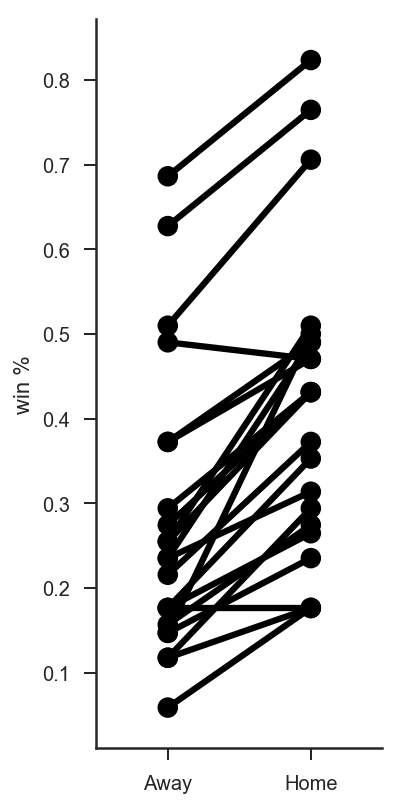

In [16]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette=['k'], size=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', scatter_kws={'alpha':0.3})
g.set_axis_labels('', 'win %');

But there are a few exceptions, namely AZ and NAC Breda. 

Now NAC win only about 17% of their games overall, so not much so say there. But AZ is a top 5 contender who in the past 3 years have won more games away than at home. Meanwhile have a look at NEC Nijmegen's home-away difference: their supporters seem to be doing a much better job.

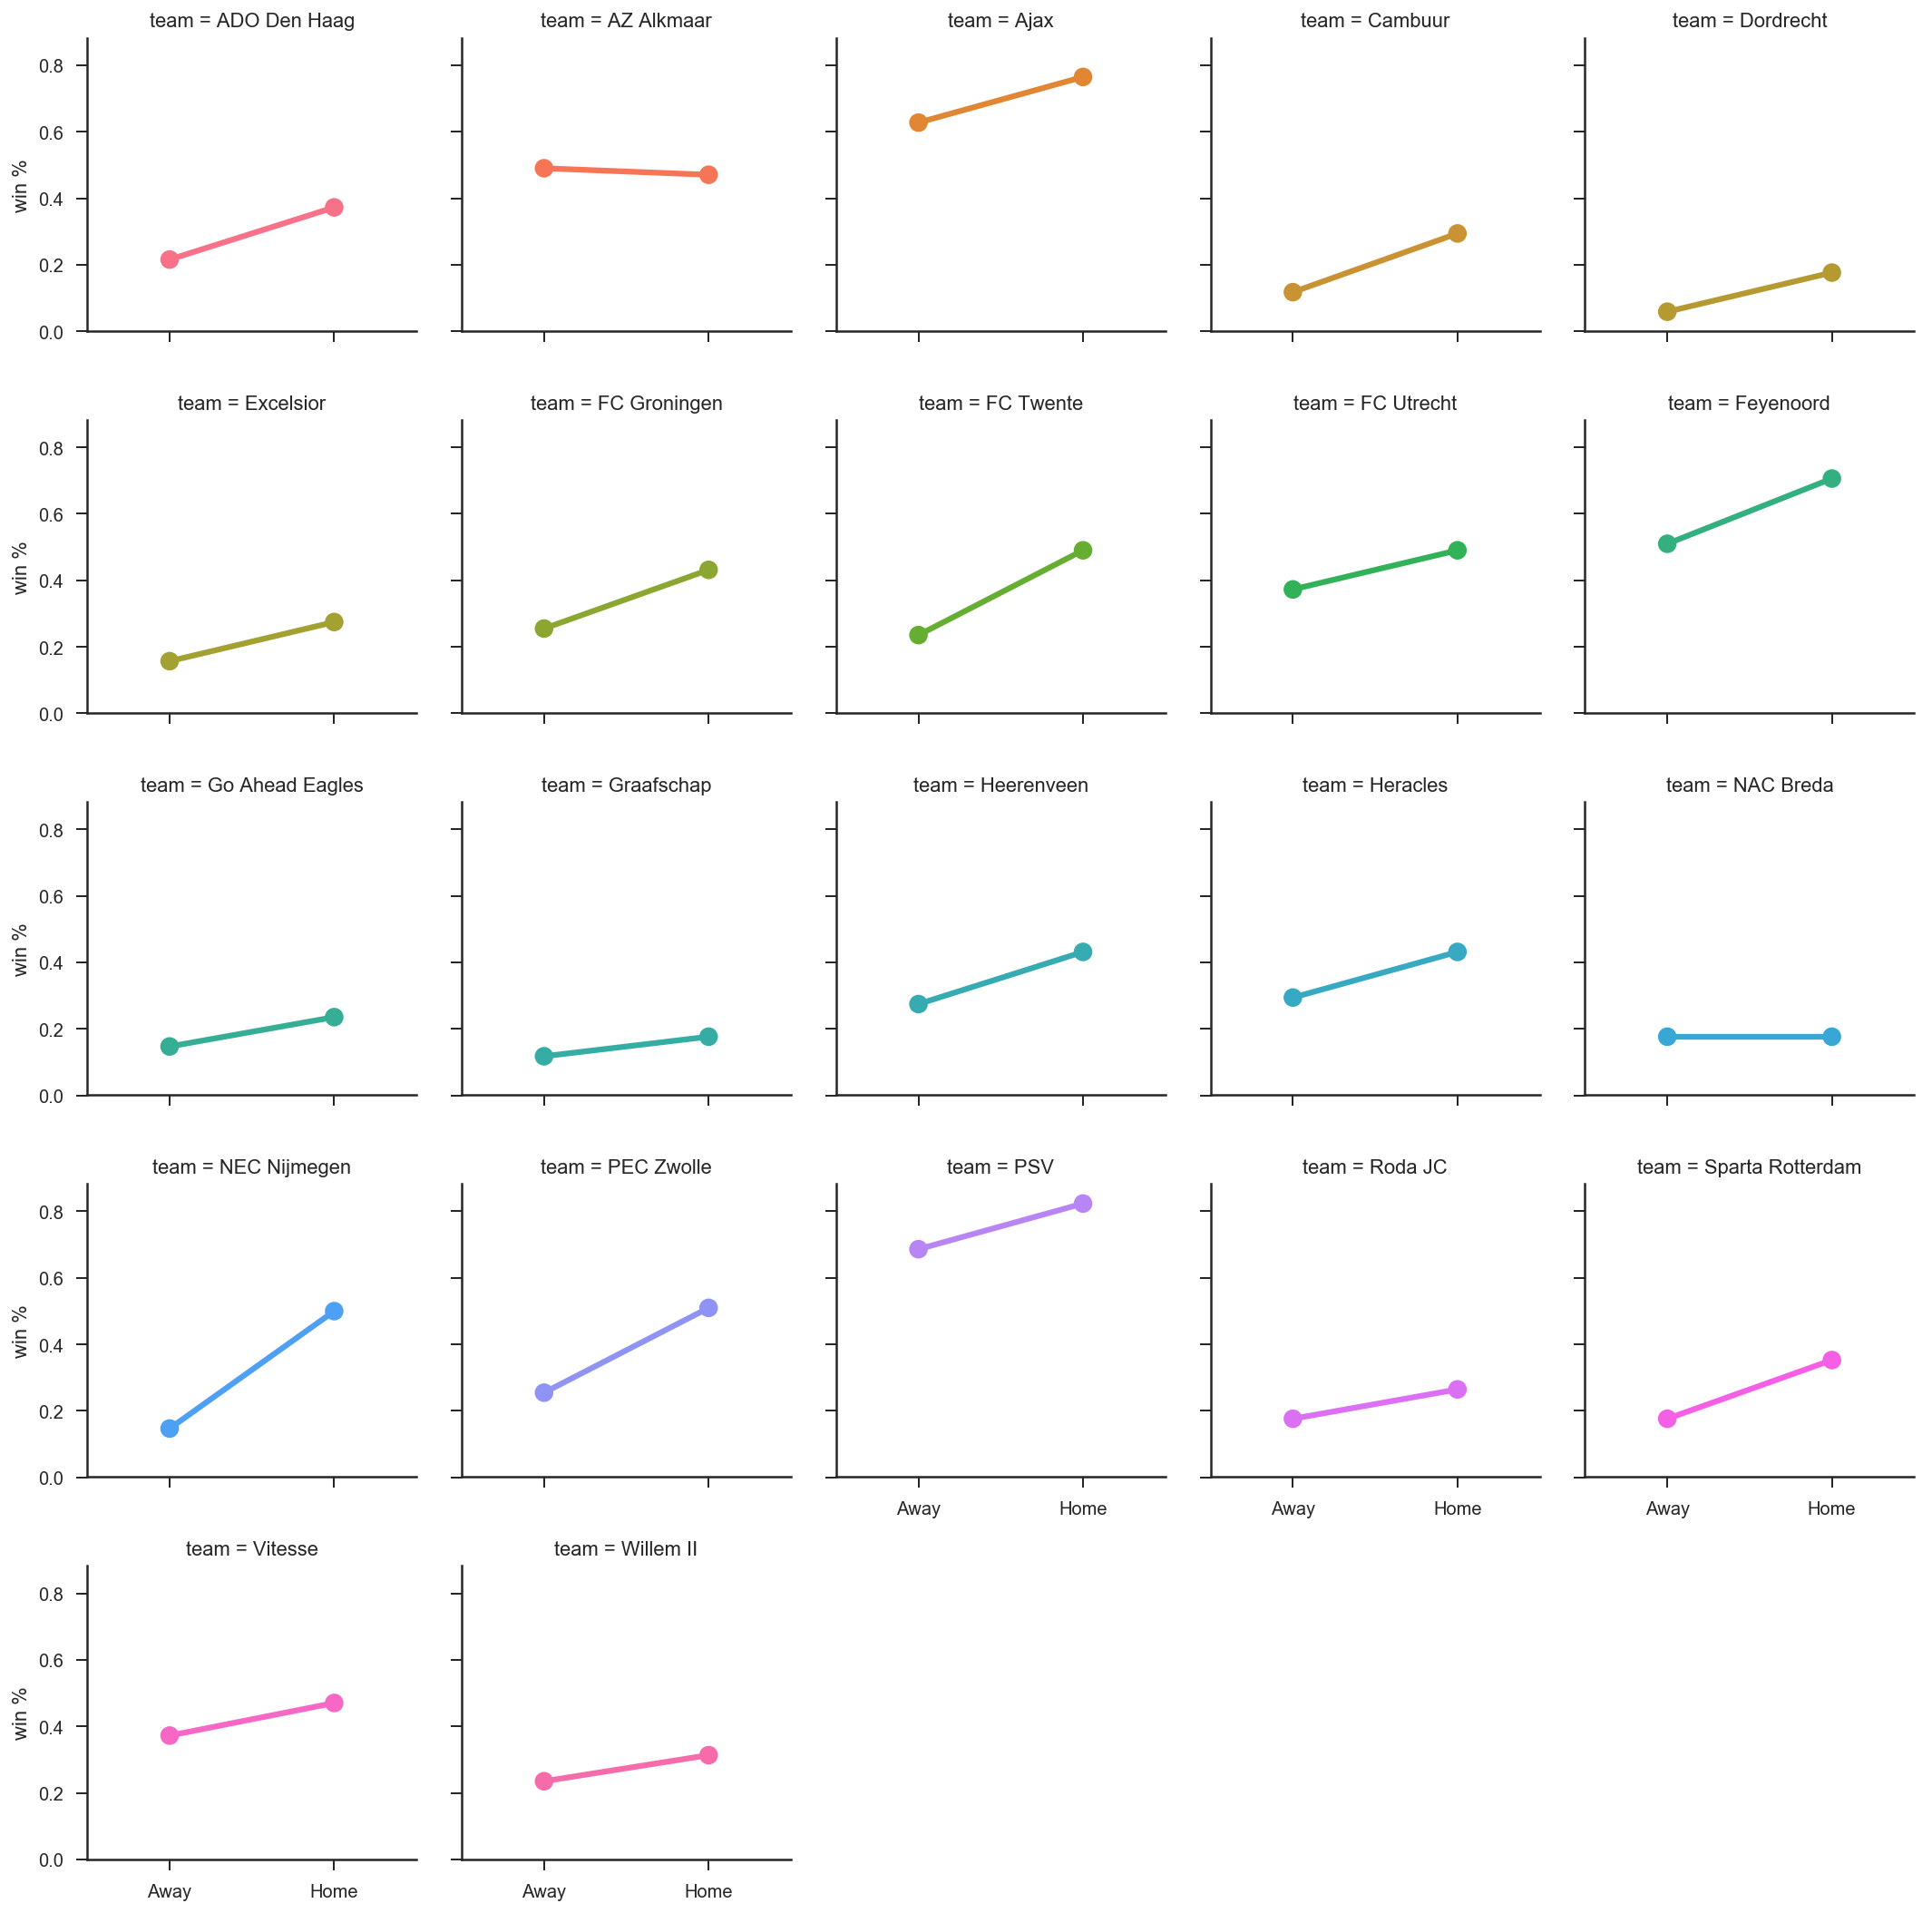

In [17]:
g = sns.FacetGrid(results.reset_index(), 
                  col='team', hue='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct')
g.set_axis_labels('', 'win %');

In [18]:
results.loc['NEC Nijmegen']

,n_win,win_pct,n_lose,lose_pct,n_draw,draw_pct
is_home,,,,,,
Away,5,0.147059,21,0.617647,8,0.235294
Home,17,0.500000,11,0.323529,6,0.176471


# ClubElo

How did the current top 5 teams in the world develop over time?

In [19]:
elo = foo.ClubElo()
current_elo = elo.read_by_date()
current_elo.head()

,index,Rank,Country,Level,Elo,From,To
team,,,,,,,
Real Madrid,0,1,ESP,1,2080.932861,2017-06-04,2017-08-19
Barcelona,1,2,ESP,1,2019.554932,2017-06-04,2017-08-19
Bayern,2,3,GER,1,1996.681396,2017-05-21,2017-08-19
Atletico,3,4,ESP,1,1950.027954,2017-06-04,2017-08-19
Juventus,4,5,ITA,1,1940.884277,2017-06-04,2017-08-19


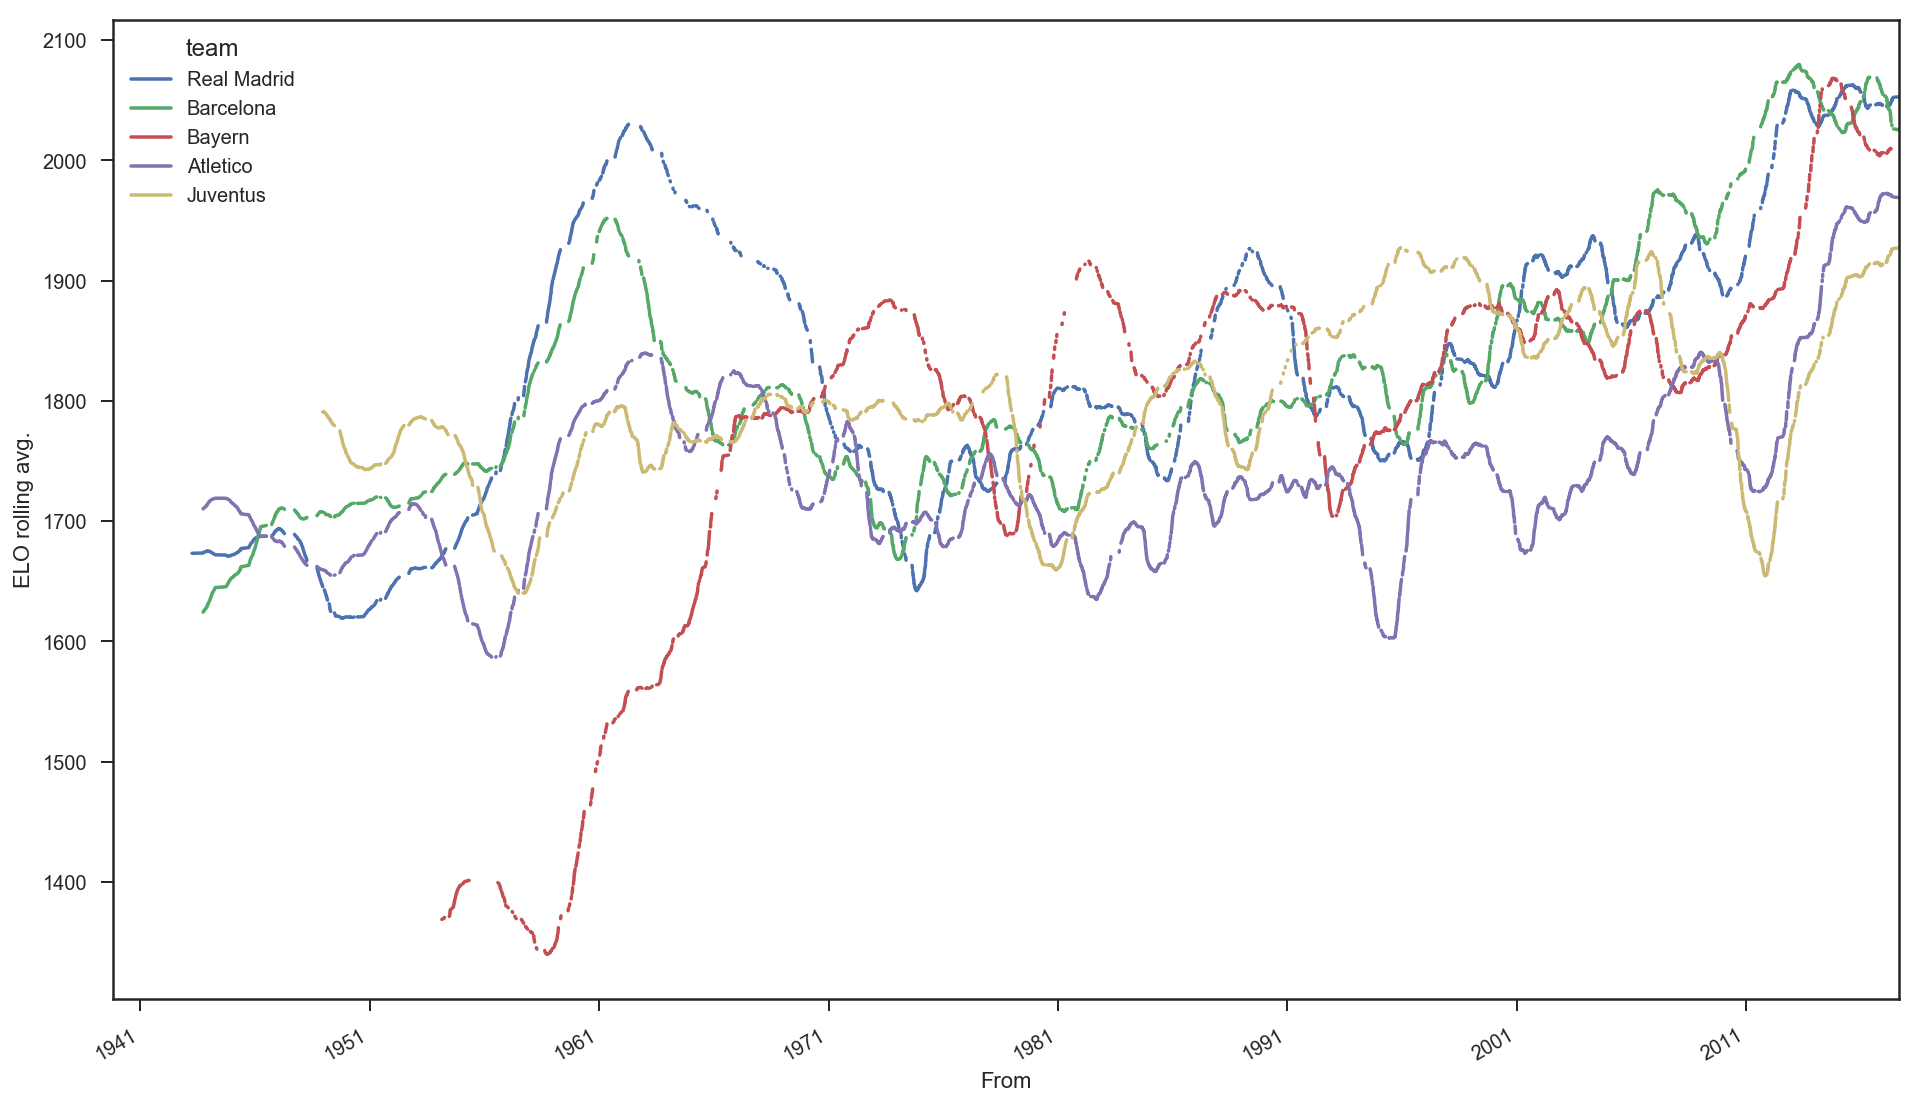

In [20]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['Elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1);